<a href="https://colab.research.google.com/github/Angelysa5/Anal-tica/blob/main/Reto_2_Modelo_Arbol_Angely_Salazar_Arbel%C3%A1ez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. Cargar las librerías de referencia para el modelo**


In [ ]:
import numpy as np #Librería que permite las funciones matemáticas
import pandas as pd #Librería que permite comunicación con Excel
import matplotlib.pyplot as plt #Librería que permite graficar
from sklearn.tree import DecisionTreeClassifier #Librería que permite el árbol de decisión
from sklearn.preprocessing import LabelEncoder

#Para no tener que cargar el archivo
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Se procede con la caraga de los datos del archivo Trveldata**

In [ ]:
nxl='/content/drive/MyDrive/2. BD1_Travel_Data_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name = 0)
XDB=XDB.dropna() #Elimina las celdas vacías o sin datos
XDB.head(100)

#Se procede con la selección de las variables de trabajo - Datos de Entrada
XD = np.array(XDB[['College','FoodSpend','Income','TravelSpend']])

#Datos de Salida - Valor Deseado -el dato que quiero el modelo pronostique
yd = np.array(XDB['CreditCard'])


**2. Creación del Modelo - Árbol de Decisión**

In [ ]:
#Rectifico que todos los datos con los que se trabaja sean numéricos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convertir las columnas de texto en XD
for i in range(XD.shape[1]):
    if isinstance(XD[0, i], str):  # Verificar si la columna contiene cadenas de texto
        XD[:, i] = le.fit_transform(XD[:, i])

# Convertir la columna de texto en yd (si es necesario)
if isinstance(yd[0], str):
    yd = le.fit_transform(yd)

# Ahora puedes entrenar tu modelo:
mar = DecisionTreeClassifier(criterion="gini", max_depth=4)
mar.fit(XD, yd)

DecisionTreeClassifier(max_depth=4)

In [ ]:
mar=DecisionTreeClassifier(criterion="gini", max_depth = 4) #4 niveles o variables de entrada
mar.fit(XD,yd)
ydp=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

[[334   9]
 [ 42 115]]


In [ ]:
#Evaluamos el modelo
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]
print()

print("Verdaderos Negativos:",VN)
print("Falsos Positivos:",FP)
print("Falsos Negativos:",FN)
print("Verdaderos Positivos:",VP)
print()

Ex=(VN+VP)/(VN+FP+FN+VP) #Qué porcentaje de los datos pronosticó correctamente
print("La exactitud alcanzada por el modelo es: ",Ex)
print()
Se=VP/(VP+FN) #Qué porcentaje de los positivos pronosticó correctamente
print("La sensibilidad alcanzada por el modelo es: ",Se)
print()
Es=VN/(VN+FP) #Qué porcentaje de los negativos pronosticó correctamente
print("La especificidad alcanzada por el modelo es: ",Es)


Verdaderos Negativos: 334
Falsos Positivos: 9
Falsos Negativos: 42
Verdaderos Positivos: 115

La exactitud alcanzada por el modelo es:  0.898

La sensibilidad alcanzada por el modelo es:  0.732484076433121

La especificidad alcanzada por el modelo es:  0.9737609329446064


Luego de hacer el ajuste, el modelo logró un 89.8% de exactitud, un 73.2% de sensibilidad y un 97.3% de especificidad.

**3. ¿Y dónde está el árbol?**

In [ ]:
#Estas son las librerias para graficar árbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

VS = ['College','FoodSpend','Income','TravelSpend'] #Son los títulos para los nodos
dot_graph=export_graphviz(mar,feature_names=VS)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

#Estoy pidiendo que me exporte el árbol

True

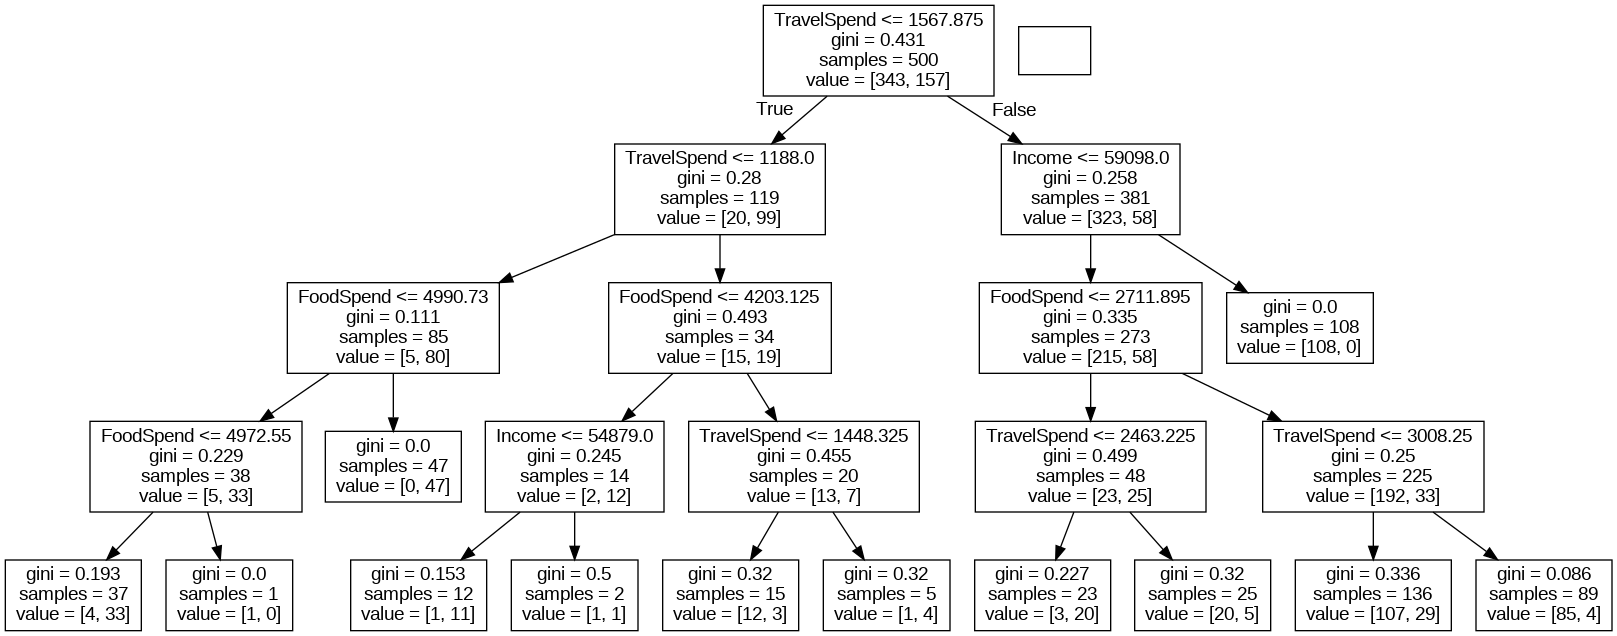

In [ ]:
from IPython.display import Image
Image(filename='arbol.png')

**4. Se procede con el pronóstico de los nuevos clientes**

In [ ]:
XDB2=pd.read_excel(nxl, sheet_name=0)
XDB2 = XDB2.dropna() #Elimina las celdas vacías o sin datos
XDB2.head(100)

XD2= np.array(XDB2[['College','FoodSpend','Income','TravelSpend']])
le = LabelEncoder()
for i in range(XD2.shape[1]):
    if isinstance(XD2[0, i], str):  # Check if the column contains strings
        XD2[:, i] = le.fit_transform(XD2[:, i])
print(XD2)
print()

#Pronosticamos la preaprobacion
ydp2 = mar.predict(XD2)

print( "El número total de Datos es:" , len(ydp2))
print()
print( "El número de clientes que utilizarán la tarjeta de crédito para el pago de los gastos de viaje y de los alimentos es:" ,np.sum(ydp2))
print()
print( "El número de clientes que NO utilizarán la tarjeta de crédito para el pago de los gastos de viaje y de los alimentos es:" , len(ydp2)-np.sum(ydp2))

[[1 5472.43 49150 827.4]
 [0 9130.73 47806 863.55]
 [0 4450.67 46050 1180.05]
 ...
 [0 3585.86 42250 2251.95]
 [1 1833.95 60248 2000.25]
 [0 6205.97 58520 3667.5]]

El número total de Datos es: 500

El número de clientes que utilizarán la tarjeta de crédito para el pago de los gastos de viaje y de los alimentos es: 124

El número de clientes que NO utilizarán la tarjeta de crédito para el pago de los gastos de viaje y de los alimentos es: 376


**Análisis de Resultados:**

De acuerdo con la base de datos suministrada y el nodo base del árbol de decisión se puede observar un total de 500 datos, divididos en 124 clientes que utilizarán la tarjeta de crédito para el pago de los gastos de viaje y de los alimentos y un total de 376 clientes que NO utilizarán la tarjeta de crédito para el pago de los gastos de viaje y de los alimentos, esto representa el 24.8% y el 75.2% respectivamente. de acuerdo con el pronóstico realizado por el modelo, este alcanzó una exactitud cercana al 89.8%, respecto a los valores de la sensibilidad que mide el comportamiento del modelo frente a la clasificación de los clientes que sí usarán la tarjeta, así como frente a la especificidad, indicador que mide el comportamiento del modelo frente a la clasificación de clientes que no utilizarán la tarjeta en sus próximos viajes.



Se destacan 3 nodos puros ['NoUtilizarán:0,SíUtilizarán:47'], en donde los solicitantes de crédito deben de cumplir con la siguiente regla: SI TravelS<=1567 AND TravelS<=1188 AND FoodS>4990 con respecto al pronóstico, se puede observar un total de 47 individuos que sí la utilizarán de los cuales un total de 47 pueden utilizarla y un total de 0 que pueden no la utilicen.

 ['NoUtilizarán:1,SíUtilizarán:0'], en donde los solicitantes de crédito deben de cumplir con la siguiente regla: SI TravelS<=1567 AND TravelS<=1188 AND FoodS<=4990 AND FoodS>4972 con respecto al pronóstico, se puede observar un total de 1 individuo que sí la utilizarán de los cuales un total de 0 pueden utilizarla y un total de 1 que pueden no la utilicen.

 Por último, ['NoUtilizarán:108,SíUtilizarán:0'], en donde los solicitantes de crédito deben de cumplir con la siguiente regla: SI TravelS>1567 AND Inc>59098 con respecto al pronóstico, se puede observar un total de 108 individuos que no la utilizarán de los cuales un total de 0 pueden utilizarla y un total de 108 que pueden no la utilicen.

Respecto a la posibilidad de que una persona con las características del 1ER individuo (2da fila del Excel) de la base de datos con las siguientes características: FoodS:5472, Inc:49140 y TravelS:827 utilice la tarjeta de crédito para el pago de sus viajes y los gastos de sus alimentos tras seguir la siguiente regla: SI TravelS<=1567 AND TravelS<=1188 AND FoodS>4990 la probabilidad es de 100% que No la use y 0% que Sí la use, ['NoUtilizarán:1,SíUtilizarán:0'].

Respecto a la posibilidad de que una persona con las características del 2do individuo (3ra fila del Excel) de la base de datos con las siguientes características: FoodS:9130, Inc:47806 y TravelS:863 utilice la tarjeta de crédito para el pago de sus viajes y los gastos de sus alimentos tras seguir la siguiente regla: SI TravelS<=1567 AND TravelS<=1188 AND FoodS>4990 la probabilidad es de 0% que No la use y 100% que Sí la use.

Según el segundo individuo planteado en el cuestionario (en la pregunta 5) que cumple con la siguiente regla: SI TravelS>1567 AND Inc<=59098 AND FoodS>2711 AND TravelS<=3008, se puede observar un total de 136 individuos que no la utilizarán de los cuales un total de 29 pueden utilizarla y un total de 107 que pueden no la utilicen. la probabilidad es de 78% que No la use y 21% que Sí la use.

Además, respecto a la posibilidad de que una persona que siga la siguiente regla: SI TravelS>1567 AND Inc<=59098 AND FoodS<2711 AND TravelS>2463 la probabilidad es de 20% que No la use y 5% que Sí la use.